## Download e construção do dataset

In [ ]:
# conecta ao drive para acessar os datasets armazenados
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


Os dados climáticos da cidade de São Carlos estão armazenados em arquivos csv para cada ano. Portanto, pegamos o máximo de arquivos de dados que pudemos.

In [ ]:
# obtém a pasta e nome dos arquivos de dados
# def path(file = "", extraPath=""):
#     # return '/content/drive/MyDrive/SeriesTemp' + extraPath + "/" + file
#     return '/content/drive/MyDrive/Colab Notebooks/SeriesTemp' + extraPath + "/" + file
#     # return '/content/drive/MyDrive/USP/SeriesTemp' + extraPath + "/" + file

# extraDataSetPath = "/Datasets"
# df_names = [filename for filename in os.listdir(path("", extraDataSetPath))]

# df_names

['INMET_SE_SP_A711_SAO CARLOS_04-09-2006_A_31-12-2006.CSV',
 'INMET_SE_SP_A711_SAO CARLOS_01-01-2007_A_31-12-2007.CSV',
 'INMET_SE_SP_A711_SAO CARLOS_01-01-2008_A_31-12-2008.CSV',
 'INMET_SE_SP_A711_SAO CARLOS_01-01-2009_A_31-12-2009.CSV',
 'INMET_SE_SP_A711_SAO CARLOS_01-01-2010_A_31-12-2010.CSV',
 'INMET_SE_SP_A711_SAO CARLOS_01-01-2011_A_31-12-2011.CSV',
 'INMET_SE_SP_A711_SAO CARLOS_01-01-2012_A_31-12-2012.CSV',
 'INMET_SE_SP_A711_SAO CARLOS_01-01-2013_A_31-12-2013.CSV',
 'INMET_SE_SP_A711_SAO CARLOS_01-01-2014_A_31-12-2014.CSV',
 'INMET_SE_SP_A711_SAO CARLOS_01-01-2015_A_31-12-2015.CSV',
 'INMET_SE_SP_A711_SAO CARLOS_01-01-2016_A_31-12-2016.CSV',
 'INMET_SE_SP_A711_SAO CARLOS_01-01-2017_A_31-12-2017.CSV',
 'INMET_SE_SP_A711_SAO CARLOS_01-01-2018_A_31-12-2018.CSV',
 'INMET_SE_SP_A711_SAO CARLOS_01-01-2019_A_31-12-2019.CSV',
 'INMET_SE_SP_A711_SAO CARLOS_01-01-2020_A_31-12-2020.CSV',
 'INMET_SE_SP_A711_SAO CARLOS_01-01-2021_A_31-12-2021.CSV',
 'INMET_SE_SP_A711_SAO CARLOS_01-01-2022

Antes de juntá-los, é importante definirmos a ordem correta de junção dos dados. Pois se trata de uma série temporal.

In [ ]:
# map_year_file = {}
# for file in df_names:
#     year = int(file[-8:-4])
#     map_year_file[year] = file

# map_year_file

{2006: 'INMET_SE_SP_A711_SAO CARLOS_04-09-2006_A_31-12-2006.CSV',
 2007: 'INMET_SE_SP_A711_SAO CARLOS_01-01-2007_A_31-12-2007.CSV',
 2008: 'INMET_SE_SP_A711_SAO CARLOS_01-01-2008_A_31-12-2008.CSV',
 2009: 'INMET_SE_SP_A711_SAO CARLOS_01-01-2009_A_31-12-2009.CSV',
 2010: 'INMET_SE_SP_A711_SAO CARLOS_01-01-2010_A_31-12-2010.CSV',
 2011: 'INMET_SE_SP_A711_SAO CARLOS_01-01-2011_A_31-12-2011.CSV',
 2012: 'INMET_SE_SP_A711_SAO CARLOS_01-01-2012_A_31-12-2012.CSV',
 2013: 'INMET_SE_SP_A711_SAO CARLOS_01-01-2013_A_31-12-2013.CSV',
 2014: 'INMET_SE_SP_A711_SAO CARLOS_01-01-2014_A_31-12-2014.CSV',
 2015: 'INMET_SE_SP_A711_SAO CARLOS_01-01-2015_A_31-12-2015.CSV',
 2016: 'INMET_SE_SP_A711_SAO CARLOS_01-01-2016_A_31-12-2016.CSV',
 2017: 'INMET_SE_SP_A711_SAO CARLOS_01-01-2017_A_31-12-2017.CSV',
 2018: 'INMET_SE_SP_A711_SAO CARLOS_01-01-2018_A_31-12-2018.CSV',
 2019: 'INMET_SE_SP_A711_SAO CARLOS_01-01-2019_A_31-12-2019.CSV',
 2020: 'INMET_SE_SP_A711_SAO CARLOS_01-01-2020_A_31-12-2020.CSV',
 2021: 'IN

Ordenamos a sequência de leitura dos arquivos (de acordo com seus anos) e efetuamos a junção dos dados em apenas 1 arquivo csv.

In [ ]:
# years_sorteds = sorted(list(map_year_file.keys()))
# finalFile = [""]

# # concatenação dos dados dos arquivos ordenados
# for i in range(len(years_sorteds)):
#     arquivo = open(path(map_year_file[years_sorteds[i]], extraDataSetPath), 'r', encoding='latin-1')
#     linhas = arquivo.readlines()
#     beginToCopy = False
#     for linha in linhas:
#         # se é leitura do cabeçalho do arquivo
#         if "PRECIPITAÇÃO TOTAL".lower() in linha.lower():
#             if i == len(df_names) - 1:
#                 finalFile[0] = linha

#             beginToCopy = True
#             continue
#         elif not beginToCopy:
#             continue

#         finalFile.append(linha)

In [ ]:
# salva os dados concatenados no arquivo csv
# createdFile = open("finalFile.csv", "w")
# createdFile.write("".join(finalFile))
# createdFile.close()

## Pré processamento dos dados

In [ ]:
import numpy as np
import pandas as pd
import os

Agora que temos os dados todos em um arquivo, podemos tratá-lo.

In [ ]:
df = pd.read_csv(("finalFile.csv"), sep=';')
df.head()

,Data,Hora UTC,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",Unnamed: 19
0,2006-09-04,00:00,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999,NaN
1,2006-09-04,01:00,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999,NaN
2,2006-09-04,02:00,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999,NaN
3,2006-09-04,03:00,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999,NaN
4,2006-09-04,04:00,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999,NaN


Vemos também a distribuição dos dados nos anos contabilizados.

### Tratamento das colunas

Tratamos primeiro o nome das colunas para ficarem com letras minúsculas.

In [ ]:
newColumnNames = []
for name in df.columns:
    newColumnNames.append(name.lower())

df.columns = newColumnNames
newColumnNames

['data',
 'hora utc',
 'precipitação total, horário (mm)',
 'pressao atmosferica ao nivel da estacao, horaria (mb)',
 'pressão atmosferica max.na hora ant. (aut) (mb)',
 'pressão atmosferica min. na hora ant. (aut) (mb)',
 'radiacao global (kj/m²)',
 'temperatura do ar - bulbo seco, horaria (°c)',
 'temperatura do ponto de orvalho (°c)',
 'temperatura máxima na hora ant. (aut) (°c)',
 'temperatura mínima na hora ant. (aut) (°c)',
 'temperatura orvalho max. na hora ant. (aut) (°c)',
 'temperatura orvalho min. na hora ant. (aut) (°c)',
 'umidade rel. max. na hora ant. (aut) (%)',
 'umidade rel. min. na hora ant. (aut) (%)',
 'umidade relativa do ar, horaria (%)',
 'vento, direção horaria (gr) (° (gr))',
 'vento, rajada maxima (m/s)',
 'vento, velocidade horaria (m/s)',
 'unnamed: 19']

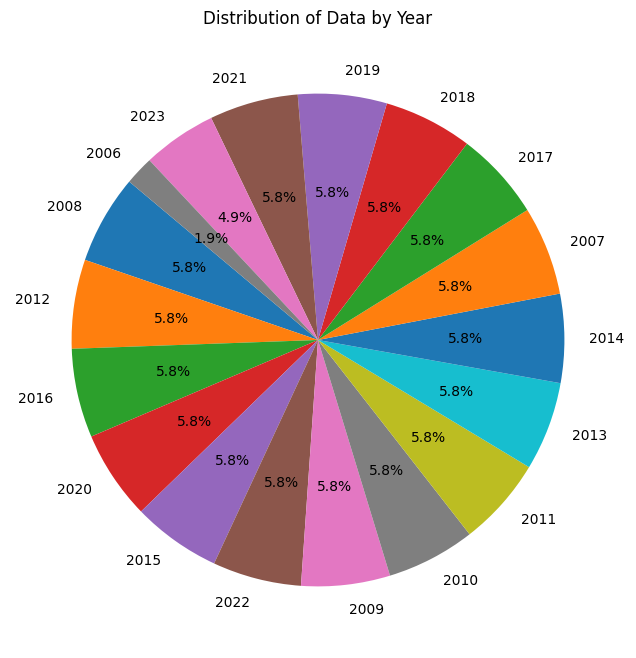

In [ ]:
import matplotlib.pyplot as plt

df['data'] = pd.to_datetime(df['data'])
df['year'] = df['data'].dt.year

year_counts = df['year'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(year_counts, labels=year_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Data by Year')
plt.show()

Com isso, também droparemos colunas que não apresentam informações relevantes para nosso trabalho, tanto por redundância, quanto por inutilidade.

In [ ]:
columnsToDrop = [
    'pressão atmosferica max.na hora ant. (aut) (mb)',
    'pressão atmosferica min. na hora ant. (aut) (mb)',
    'temperatura orvalho max. na hora ant. (aut) (°c)',
    'temperatura orvalho min. na hora ant. (aut) (°c)',
    'umidade rel. max. na hora ant. (aut) (%)',
    'umidade rel. min. na hora ant. (aut) (%)',
    'vento, direção horaria (gr) (° (gr))',
    'unnamed: 19'
]

In [ ]:
df = df.drop(columns=columnsToDrop)

### Eliminação inicial de dados faltantes

Em alguns anos, valores faltantes estão representados pelo valor -9999. Portanto substituiremo-os por NaN para facilitar o tratamento.

In [ ]:
df = df.replace("-9999", np.nan)
df = df.replace(np.float64("-9999.0"), np.nan)
df

,data,hora utc,"precipitação total, horário (mm)","pressao atmosferica ao nivel da estacao, horaria (mb)",radiacao global (kj/m²),"temperatura do ar - bulbo seco, horaria (°c)",temperatura do ponto de orvalho (°c),temperatura máxima na hora ant. (aut) (°c),temperatura mínima na hora ant. (aut) (°c),"umidade relativa do ar, horaria (%)","vento, rajada maxima (m/s)","vento, velocidade horaria (m/s)",year
0,2006-09-04,00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006
1,2006-09-04,01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006
2,2006-09-04,02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006
3,2006-09-04,03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006
4,2006-09-04,04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150403,2023-10-31,1900 UTC,"7,6",917,"23,8","19,6","18,7","22,2","19,6",94.0,"11,9","3,3",2023
150404,2023-10-31,2000 UTC,"2,2","916,7","9,4","19,7","18,7","19,8","19,5",94.0,"6,6",",5",2023
150405,2023-10-31,2100 UTC,"1,4","917,1","13,1","19,5","18,5","19,8","19,4",94.0,"3,6","1,1",2023
150406,2023-10-31,2200 UTC,",2","916,8","1,2","19,6","18,6","19,7","19,5",94.0,"3,8","1,9",2023


Veremos agora a quantidade de dados faltantes no dataset

In [ ]:
df.isna().sum()

data                                                         0
hora utc                                                     0
precipitação total, horário (mm)                         13737
pressao atmosferica ao nivel da estacao, horaria (mb)    11553
radiacao global (kj/m²)                                  76220
temperatura do ar - bulbo seco, horaria (°c)             12063
temperatura do ponto de orvalho (°c)                     12070
temperatura máxima na hora ant. (aut) (°c)               12108
temperatura mínima na hora ant. (aut) (°c)               12108
umidade relativa do ar, horaria (%)                      12066
vento, rajada maxima (m/s)                               12126
vento, velocidade horaria (m/s)                          12066
year                                                         0
dtype: int64

Para cada ano, foram contados o número de valores faltantes de cada coluna e calculada a porcentagem disso no conjunto de dados do ano como forma de visualização.

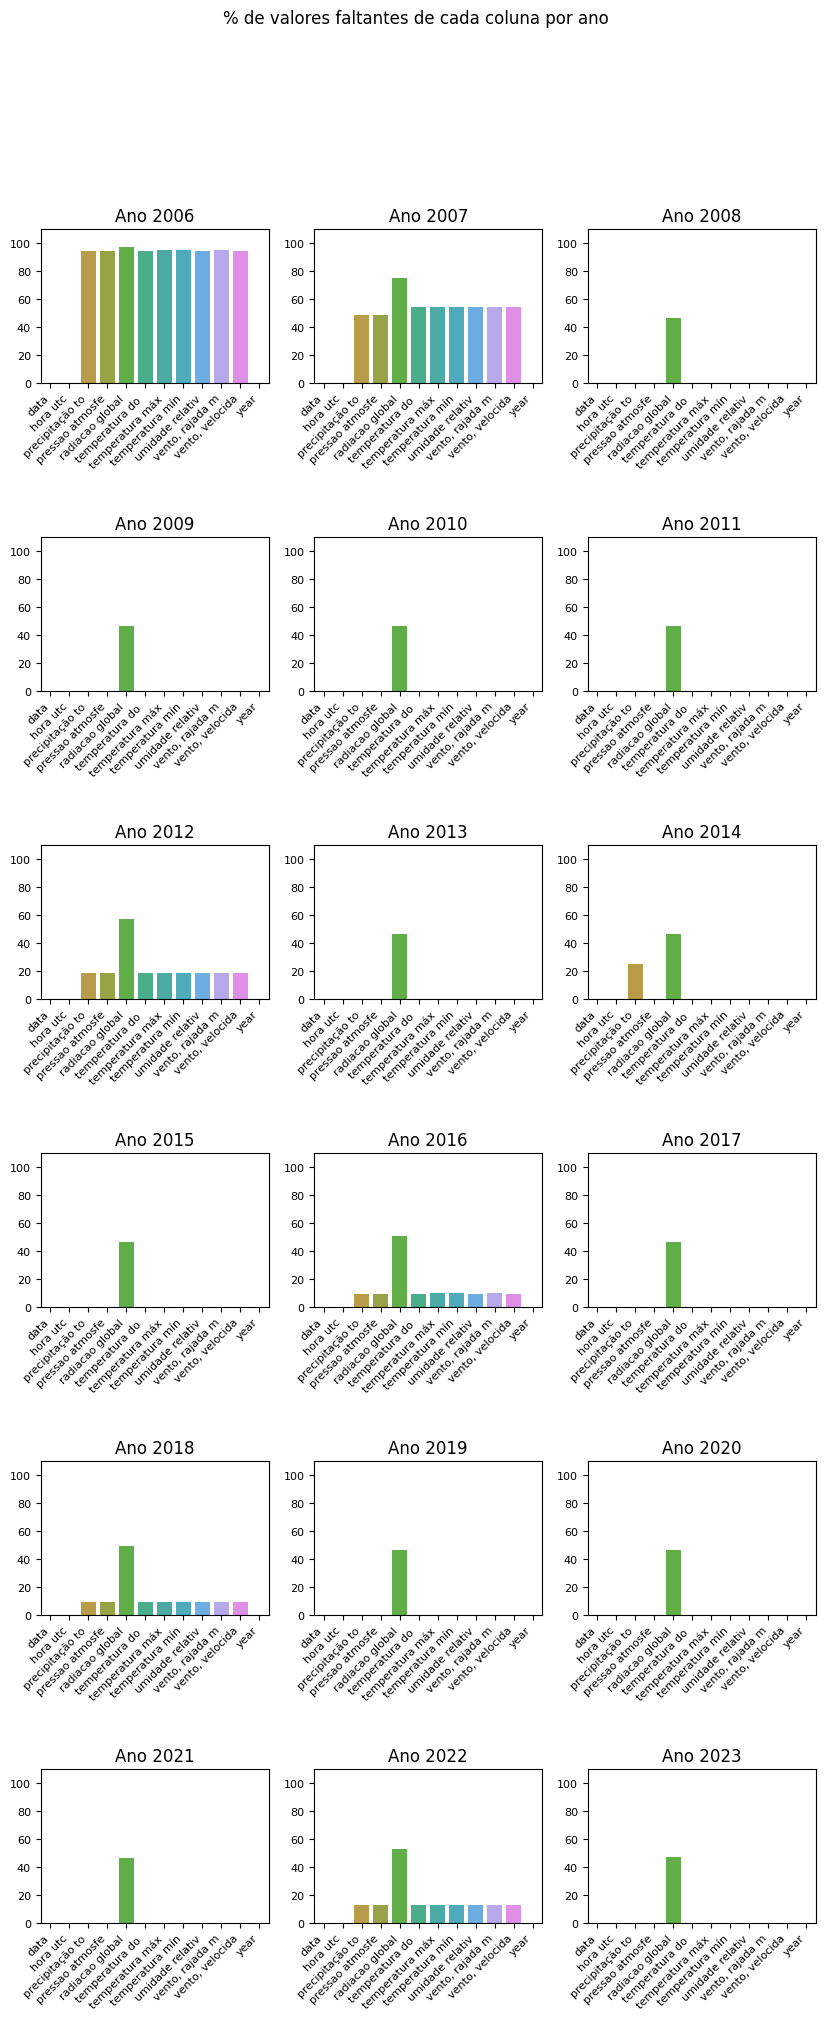

In [ ]:
import seaborn as sns

fig, axs = plt.subplots(6, 3, figsize=(10, 22))
labels_cols = [name[:15] for name in np.array(df.columns)]

# plota a contagem de valores faltantes para cada coluna de cada ano
count = 0
for year in range(2006, 2024):
    data = np.array((df[df['data'].dt.year == year].isna().sum())) / df[df['data'].dt.year == year].shape[0] * 100
    cur_ax = axs[count//3, count%3]

    cur_ax.set_title('Ano ' + str(year), fontsize=12)
    sns.barplot(x=labels_cols, y=data, ax=cur_ax)
    cur_ax.set_xticklabels(cur_ax.get_xticklabels(), rotation=45, ha="right")
    cur_ax.set_ylim(0, 110)
    cur_ax.tick_params(axis='x', labelsize=8)
    cur_ax.tick_params(axis='y', labelsize=8)

    count += 1
    if count > 18:
        break

plt.subplots_adjust(hspace=1)
plt.suptitle('% de valores faltantes de cada coluna por ano')
fig.show()

Podemos concluir então que os anos de 2006 e 2007 apresentam muitos dados faltantes e, portanto o melhor é eliminá-los do dataset.

In [ ]:
df = df.loc[~(df['data'].dt.year == 2006)]
df = df.loc[~(df['data'].dt.year == 2007)]
df

,data,hora utc,"precipitação total, horário (mm)","pressao atmosferica ao nivel da estacao, horaria (mb)",radiacao global (kj/m²),"temperatura do ar - bulbo seco, horaria (°c)",temperatura do ponto de orvalho (°c),temperatura máxima na hora ant. (aut) (°c),temperatura mínima na hora ant. (aut) (°c),"umidade relativa do ar, horaria (%)","vento, rajada maxima (m/s)","vento, velocidade horaria (m/s)",year
11616,2008-01-01,00:00,0,"916,3",NaN,"25,6","18,3",28,"25,6",64.0,"5,9",",3",2008
11617,2008-01-01,01:00,0,"917,1",NaN,"25,3","18,3","25,6","24,8",65.0,"3,4","1,3",2008
11618,2008-01-01,02:00,0,"917,2",NaN,"24,2","18,8","25,7","24,2",72.0,"5,5","2,2",2008
11619,2008-01-01,03:00,0,"916,6",NaN,"23,3","19,3","24,2","22,9",78.0,"4,7","1,2",2008
11620,2008-01-01,04:00,0,916,NaN,"22,7","19,2","23,3","22,5",81.0,"2,8",1,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150403,2023-10-31,1900 UTC,"7,6",917,"23,8","19,6","18,7","22,2","19,6",94.0,"11,9","3,3",2023
150404,2023-10-31,2000 UTC,"2,2","916,7","9,4","19,7","18,7","19,8","19,5",94.0,"6,6",",5",2023
150405,2023-10-31,2100 UTC,"1,4","917,1","13,1","19,5","18,5","19,8","19,4",94.0,"3,6","1,1",2023
150406,2023-10-31,2200 UTC,",2","916,8","1,2","19,6","18,6","19,7","19,5",94.0,"3,8","1,9",2023


A coluna "RADIACAO GLOBAL (Kj/m²)", apesar de possuir muitos dados faltante, esses dados são de horários noturnos (que não possuem valores de radiação global). Portanto, apenas preencheremos os valores faltantes com 0.

In [ ]:
df.iloc[:,4].fillna(0, inplace=True)
df.iloc[:,4].isna().sum()

0

In [ ]:
df

,data,hora utc,"precipitação total, horário (mm)","pressao atmosferica ao nivel da estacao, horaria (mb)",radiacao global (kj/m²),"temperatura do ar - bulbo seco, horaria (°c)",temperatura do ponto de orvalho (°c),temperatura máxima na hora ant. (aut) (°c),temperatura mínima na hora ant. (aut) (°c),"umidade relativa do ar, horaria (%)","vento, rajada maxima (m/s)","vento, velocidade horaria (m/s)",year
11616,2008-01-01,00:00,0,"916,3",0,"25,6","18,3",28,"25,6",64.0,"5,9",",3",2008
11617,2008-01-01,01:00,0,"917,1",0,"25,3","18,3","25,6","24,8",65.0,"3,4","1,3",2008
11618,2008-01-01,02:00,0,"917,2",0,"24,2","18,8","25,7","24,2",72.0,"5,5","2,2",2008
11619,2008-01-01,03:00,0,"916,6",0,"23,3","19,3","24,2","22,9",78.0,"4,7","1,2",2008
11620,2008-01-01,04:00,0,916,0,"22,7","19,2","23,3","22,5",81.0,"2,8",1,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150403,2023-10-31,1900 UTC,"7,6",917,"23,8","19,6","18,7","22,2","19,6",94.0,"11,9","3,3",2023
150404,2023-10-31,2000 UTC,"2,2","916,7","9,4","19,7","18,7","19,8","19,5",94.0,"6,6",",5",2023
150405,2023-10-31,2100 UTC,"1,4","917,1","13,1","19,5","18,5","19,8","19,4",94.0,"3,6","1,1",2023
150406,2023-10-31,2200 UTC,",2","916,8","1,2","19,6","18,6","19,7","19,5",94.0,"3,8","1,9",2023


### Agrupando dados dos dias

Para utilizar a função de agrupar, primeiro convertemos os dados das colunas para numéricos.

In [ ]:
def convert_to_float(value):
    return float(value.strip().replace(',', '.'))

df.iloc[:, 2:] = df.iloc[:, 2:].applymap(lambda x: convert_to_float(x) if isinstance(x, str) else x)
df.head()

<ipython-input-18-079717d94e82>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, 2:] = df.iloc[:, 2:].applymap(lambda x: convert_to_float(x) if isinstance(x, str) else x)


,data,hora utc,"precipitação total, horário (mm)","pressao atmosferica ao nivel da estacao, horaria (mb)",radiacao global (kj/m²),"temperatura do ar - bulbo seco, horaria (°c)",temperatura do ponto de orvalho (°c),temperatura máxima na hora ant. (aut) (°c),temperatura mínima na hora ant. (aut) (°c),"umidade relativa do ar, horaria (%)","vento, rajada maxima (m/s)","vento, velocidade horaria (m/s)",year
11616,2008-01-01,00:00,0.0,916.3,0.0,25.6,18.3,28.0,25.6,64.0,5.9,0.3,2008
11617,2008-01-01,01:00,0.0,917.1,0.0,25.3,18.3,25.6,24.8,65.0,3.4,1.3,2008
11618,2008-01-01,02:00,0.0,917.2,0.0,24.2,18.8,25.7,24.2,72.0,5.5,2.2,2008
11619,2008-01-01,03:00,0.0,916.6,0.0,23.3,19.3,24.2,22.9,78.0,4.7,1.2,2008
11620,2008-01-01,04:00,0.0,916.0,0.0,22.7,19.2,23.3,22.5,81.0,2.8,1.0,2008


Agrupando os dados por dias.

In [ ]:
df_cp = df.groupby('data').mean().reset_index()
df_cp.year = df_cp.year.astype(int)
df_cp.head()

<ipython-input-19-52dcb80b87c6>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_cp = df.groupby('data').mean().reset_index()


,data,"precipitação total, horário (mm)","pressao atmosferica ao nivel da estacao, horaria (mb)",radiacao global (kj/m²),"temperatura do ar - bulbo seco, horaria (°c)",temperatura do ponto de orvalho (°c),temperatura máxima na hora ant. (aut) (°c),temperatura mínima na hora ant. (aut) (°c),"umidade relativa do ar, horaria (%)","vento, rajada maxima (m/s)","vento, velocidade horaria (m/s)",year
0,2008-01-01,0.108333,916.783333,652.533333,24.837500,18.683333,25.791667,23.979167,70.041667,5.304167,1.758333,2008
1,2008-01-02,0.050000,917.591667,582.491667,23.387500,18.887500,23.962500,22.875000,76.500000,5.191667,2.000000,2008
2,2008-01-03,0.000000,919.366667,675.283333,23.600000,17.187500,24.300000,22.816667,68.583333,5.900000,2.545833,2008
3,2008-01-04,0.000000,919.650000,879.666667,23.770833,16.270833,24.466667,22.858333,65.208333,5.108333,2.216667,2008
4,2008-01-05,0.375000,918.050000,619.691667,23.187500,18.095833,23.983333,22.441667,74.208333,5.237500,2.012500,2008


### Imputação dos dados faltantes

Eliminar os anos de 2006 e 2007 e tratar a coluna de radiação ainda não foi o suficiente para tratar todos os dados faltantes. Agora que agrupamos os dados por dias, podemos ver alguns anos que possuem uma sequência considerável de dias faltantes.

In [ ]:
def plot_columns_by_year(df, columns, year, title="", figsize=(15, 6)):
    plt.figure(figsize=figsize)
    for col in columns:
        plt.plot(df.loc[df.data.dt.year == year].data, df.loc[df.data.dt.year == year][col], label=col)

    plt.title(title)
    plt.legend()
    plt.show()

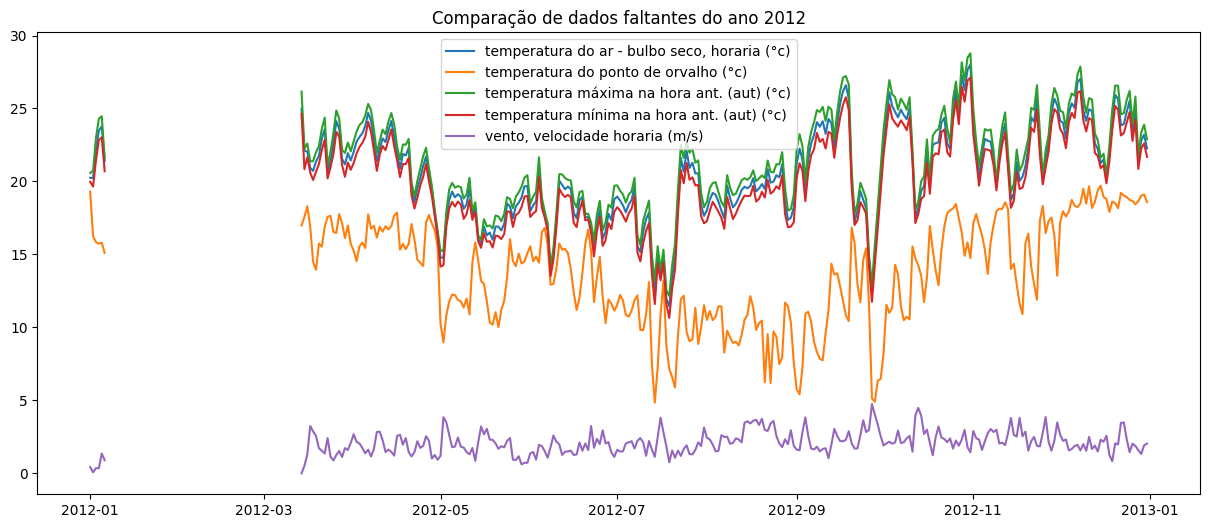

In [ ]:
year = 2012
title = f"Comparação de dados faltantes do ano {year}"
columns = [x for x in df_cp.columns if 'temperatura' in x]
columns.append('vento, velocidade horaria (m/s)')
plot_columns_by_year(df_cp, columns, year, title)

O ano de 2012 possui praticamente 2 meses seguidos (janeiro e fevereiro) por exemplo. Portanto, devemos arrumar alguma estratégia para preenche-los de forma que minimize a alteração das características da série.

Para isso, testamos 2 possibilidades promissoras:
- Imputação por média móvel;
- Imputação por pchip.

In [ ]:
def imputation_by_moving_average(df, column, window_length = 75):
    for i in range(len(df)):
        if pd.isna(df.at[i, column]):
            # Calculate moving average for the specific column and row
            moving = df.loc[max(0, i - window_length + 1):i, column].mean()
            df.at[i, column] = moving
    return df[column]

In [ ]:
def imputation_by_pchip(df, col):
    return df[col].interpolate(method="pchip")

In [ ]:
def interpolate(df, columns, function = lambda x : x):
    df_tmp = df.copy()
    for col in columns:
        df_tmp[col] = function(df_tmp, col)

    return df_tmp

In [ ]:
df_average = interpolate(df_cp, df_cp.columns[1:-1], imputation_by_moving_average)
df_pchip = interpolate(df_cp, df_cp.columns[1:-1], imputation_by_pchip)

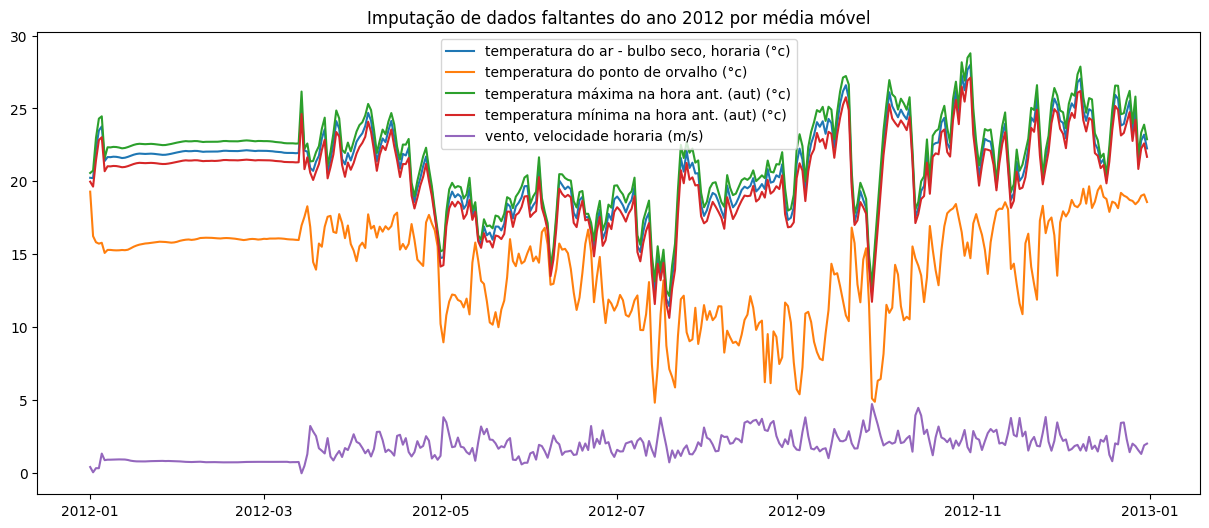

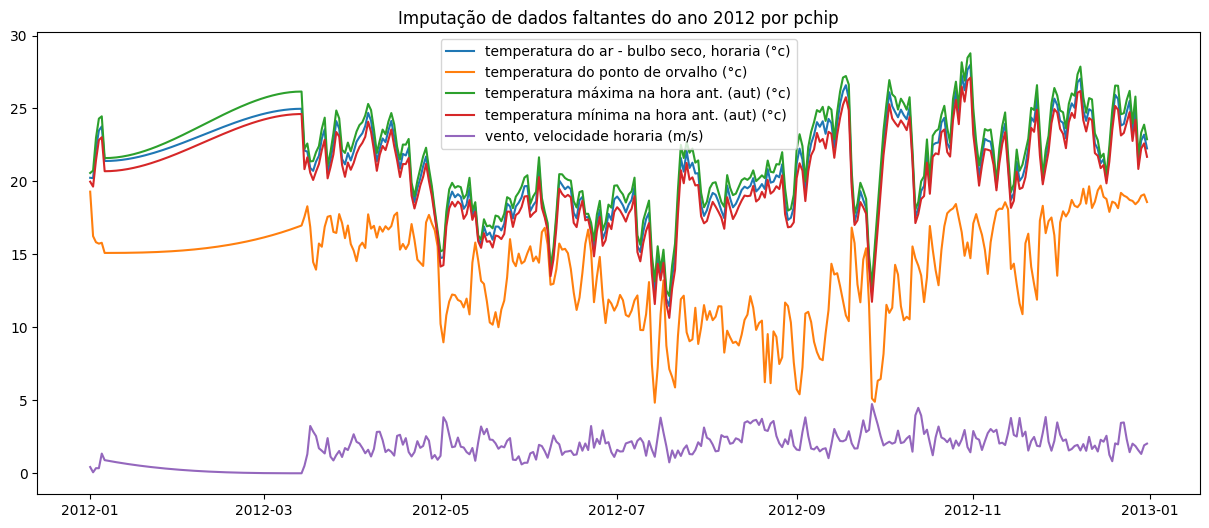

In [ ]:
year = 2012
title = f"Imputação de dados faltantes do ano {year} por média móvel"
columns = [x for x in df_average.columns if 'temperatura' in x]
columns.append('vento, velocidade horaria (m/s)')
plot_columns_by_year(df_average, columns, year, title)

title = f"Imputação de dados faltantes do ano {year} por pchip"
columns = [x for x in df_pchip.columns if 'temperatura' in x]
columns.append('vento, velocidade horaria (m/s)')
plot_columns_by_year(df_pchip, columns, year, title)

Por convenção do grupo, escolhemos utilizar a **média móvel** por ser mais flexível e apresentar mais ruídos que as curvas de imputação calculadas pelo pchip, tornando-a mais representativa no conjunto de dados.

# Identificação de ondas de calor

## Matrix Profile

Antes de aplicarmos o matrix profile, precisamos normalizar os dados com zscore para que as martrizes das colunas geradas possuam a mesma importância nos cálculos.

In [ ]:
from scipy.stats import zscore

for col in df_average.columns[1:]:
    df_average[col] = zscore(df_average[col])

df_average.head() # colunas com dados normalizados

,data,"precipitação total, horário (mm)","pressao atmosferica ao nivel da estacao, horaria (mb)",radiacao global (kj/m²),"temperatura do ar - bulbo seco, horaria (°c)",temperatura do ponto de orvalho (°c),temperatura máxima na hora ant. (aut) (°c),temperatura mínima na hora ant. (aut) (°c),"umidade relativa do ar, horaria (%)","vento, rajada maxima (m/s)","vento, velocidade horaria (m/s)",year
0,2008-01-01,-0.134353,-0.960763,-0.258990,1.276108,1.102876,1.349246,1.220931,0.096477,0.314554,0.094486,-1.623982
1,2008-01-02,-0.271878,-0.704122,-0.526722,0.792291,1.154172,0.747198,0.847348,0.591908,0.243763,0.394659,-1.623982
2,2008-01-03,-0.389756,-0.140570,-0.172028,0.863195,0.727055,0.858282,0.827612,-0.015394,0.689481,1.072637,-1.623982
3,2008-01-04,-0.389756,-0.050613,0.609223,0.920196,0.496747,0.913138,0.841709,-0.274297,0.191326,0.663780,-1.623982
4,2008-01-05,0.494332,-0.558604,-0.384526,0.725557,0.955270,0.754055,0.700735,0.416110,0.272604,0.410186,-1.623982


Com os dados normalizados, podemos implementar o matrix profile para utilizá-lo no processo de identificar ondas de calor.

In [ ]:
# calcula o matrix profile dos valores x de uma série dado uma janela de tamanho l
def matrix_profile(x, l=4):
    dim = x.size-l+1

    mat2 = np.empty((dim, dim))
    x_cum_sqsum = np.cumsum(np.append(0,np.square(x)))

    mp = np.empty(dim)
    mp_idx = np.empty(dim)

    x2 = x_cum_sqsum[l:]-x_cum_sqsum[0:-l]

    for i in range(dim):
        q = x[i:i+l]
        q2 = x_cum_sqsum[i+l] - x_cum_sqsum[i]
        qx = np.convolve(x, q[::-1])[l-1:]
        mat2[i] = q2 + x2 - 2 * qx[:-l+1]

        ini = int(max(0, i-(l/2)))
        fim = int(min(i + (l/2), dim))
        mat2[i][ini:fim] = np.inf

        mp_idx[i] = np.argmin(mat2[i])
        mp[i] = np.min(mat2[i])

    return np.array(mat2), np.array (mp)

In [ ]:
# retorna a soma dos matrix profiles das colunas do dataset dado um ano
def get_matrix_profile(df, year, l, columns):
    finalMatrix, finalMP = (None, None)
    x_dict = {}

    for col in columns:
        x = df.loc[df.data.dt.year == year][col].values
        x_dict[col] = x
        dist_matrix, mp = matrix_profile(x, l)

        if finalMatrix is None:
            finalMatrix, finalMP = dist_matrix, mp
        else:
            finalMatrix = finalMatrix + dist_matrix
            finalMP += mp

    return finalMatrix, finalMP, x_dict

Com as funções elaboradas, podemos finalmente implementar a função de identificar anomalias em nossas séries temporais.

A função considera os seguintes procedimentos para identificar possíveis ondas de calor no ano:
- Identifica subsequências anômalas nos dados a partir do matrix profile calculado (de todas as colunas selecionadas do dataset) e um valor **thereshold** mínimo;
- Das anomalias identificadas, seleciona aquelas com taxa de crescimento (derivada) e valores mínimos selecionados.

In [ ]:
def plot_mp_with_anomalies(df, column, finalMP, l, threshold = 0.5, min_temperature_derivate = 0.5, min_temperature = 0.3, title = None, figsize = (25, 5)):
    anomalies = np.where(finalMP > threshold)[0] # identifica anomalias pelo MP

    # seleciona das anomalias aquelas com crescimento e temperatura mínima no intervalo
    temperature = df_average[df_average.data.dt.year == year][column].values
    anomalies2 = anomalies[np.where((temperature[anomalies + l - 1] - temperature[anomalies]) > min_temperature_derivate)[0]]
    anomalies3 = anomalies2[np.where(temperature[anomalies2] > min_temperature)[0]]

    # plot dos pontos da série com as ondas de calor marcadas
    plt.figure(figsize=figsize)
    plt.plot(df_average[df_average.data.dt.year == year][column].values, color='lightblue', label=column)
    plt.plot(range(l//2, len(df_average[df_average.data.dt.year == year]) - l//2 ), finalMP*0.1, color='orange', label='matrix profile')

    used_label = False
    for i in anomalies3:
        if not used_label:
            plt.plot(range(i, i+l), df_average[df_average.data.dt.year == year][column].values[i:i+l], color='red', label='onda de calor')
            used_label = True
        else:
            plt.plot(range(i, i+l), df_average[df_average.data.dt.year == year][column].values[i:i+l], color='red')

    plt.legend()
    if title is not None:
        plt.title(title, {"size":20})

    plt.show()
    return anomalies3 # retorna os pontos da série que estão em ondas de calor

### Testes

Com o método elaborado, fizemos alguns testes com hiperparâmetros e anos para se analisar.

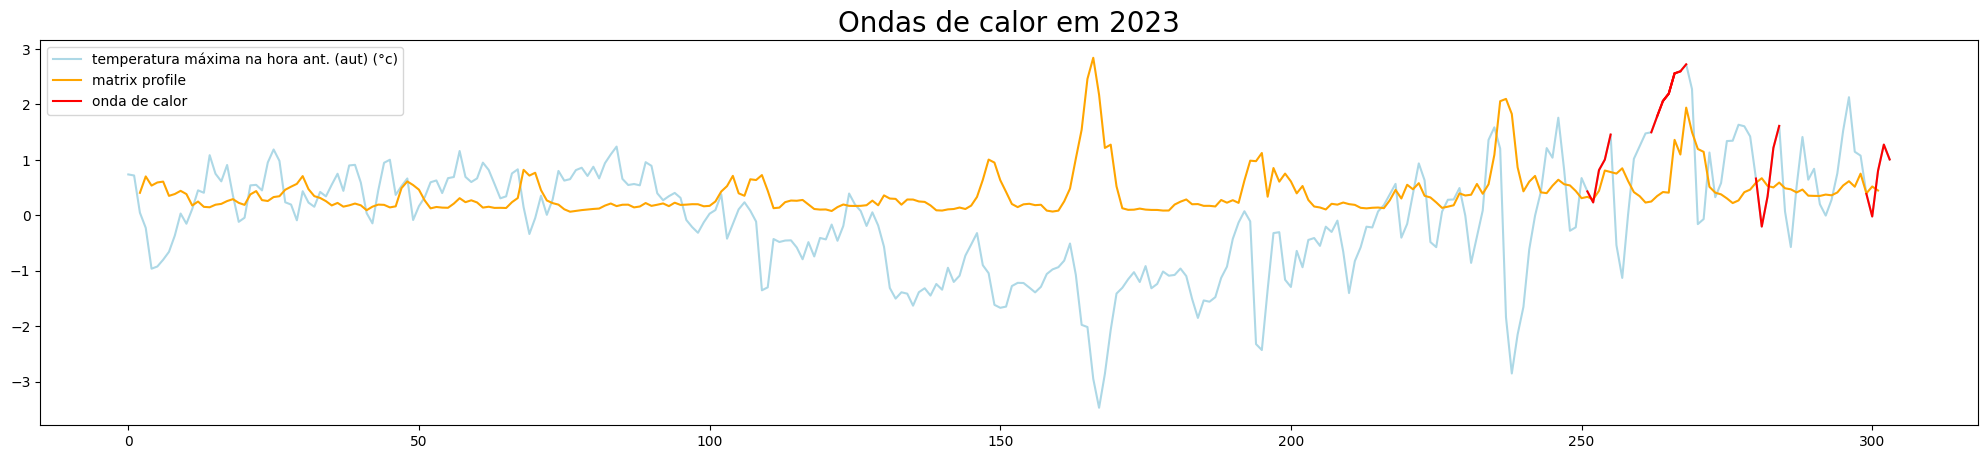

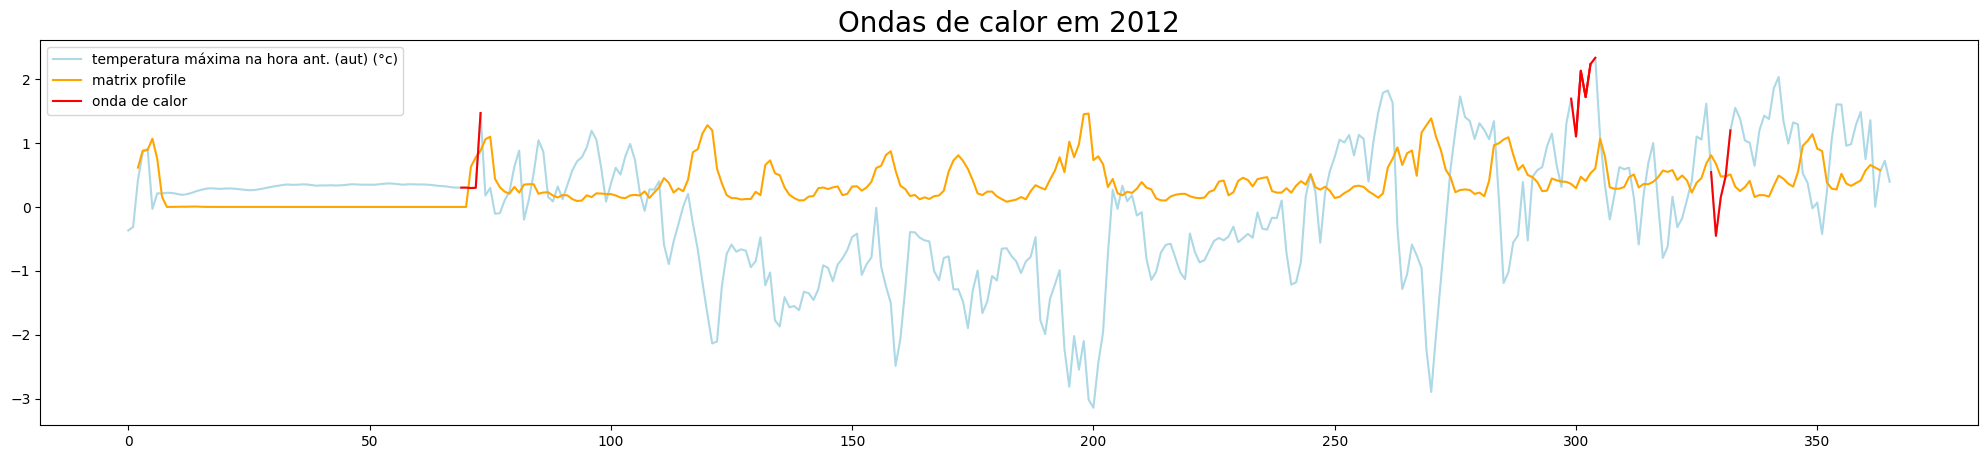

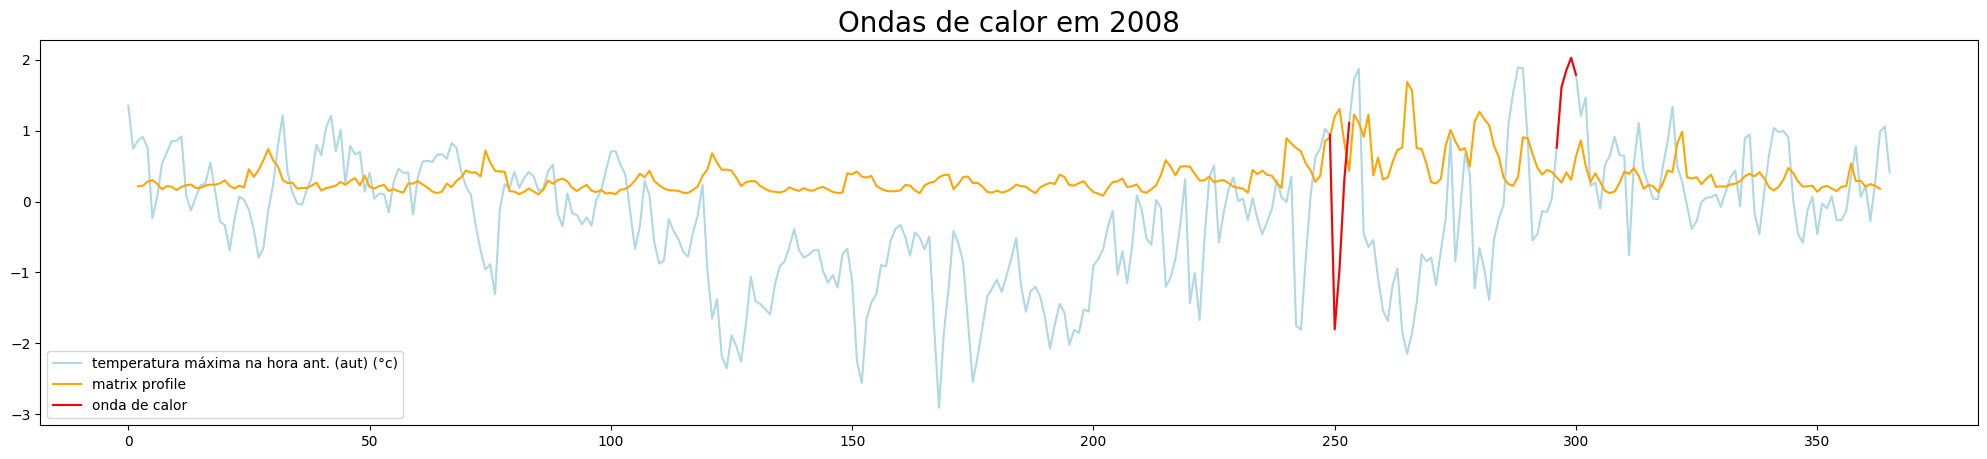

array([249, 296])

In [ ]:
year = 2023
window_length = 5
threshold = 4
title = f"Ondas de calor em {year}"

matrix, finalMP, _ = get_matrix_profile(df_average, year, window_length, df_average.columns[1:-1])
plot_mp_with_anomalies(df_average, 'temperatura máxima na hora ant. (aut) (°c)', finalMP, window_length, threshold, title=title)

year = 2012
window_length = 5
threshold = 4
title = f"Ondas de calor em {year}"

matrix, finalMP, _ = get_matrix_profile(df_average, year, window_length, df_average.columns[1:-1])
plot_mp_with_anomalies(df_average, 'temperatura máxima na hora ant. (aut) (°c)', finalMP, window_length, threshold, title=title)

year = 2008
window_length = 5
threshold = 4
title = f"Ondas de calor em {year}"

matrix, finalMP, _ = get_matrix_profile(df_average, year, window_length, df_average.columns[1:-1])
plot_mp_with_anomalies(df_average, 'temperatura máxima na hora ant. (aut) (°c)', finalMP, window_length, threshold, min_temperature_derivate=0.1, min_temperature=0.6, title=title)

Como forma de comparação, visualizamos a análise de ondas de calor de 2023 feitas com o método elaborado normalmente e outro com o **thereshold = 0** (ou seja, não irá selecionar subsequências anômalas utilizando MP).

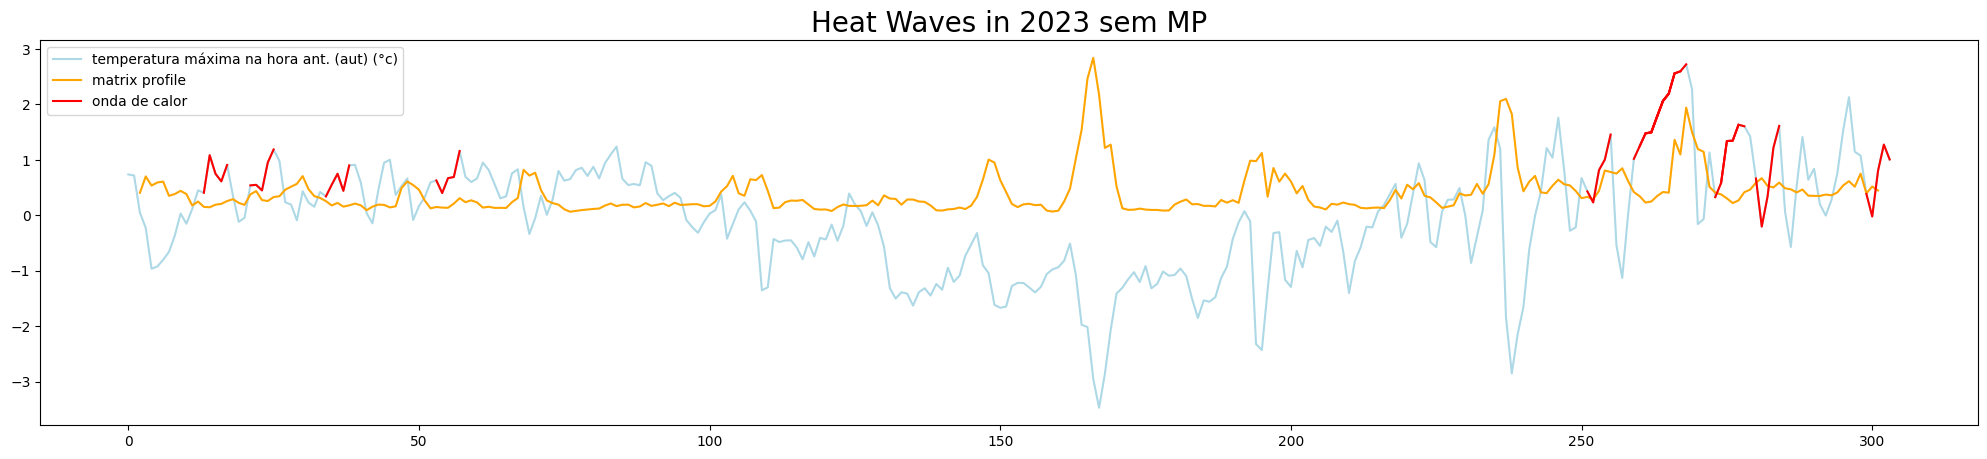

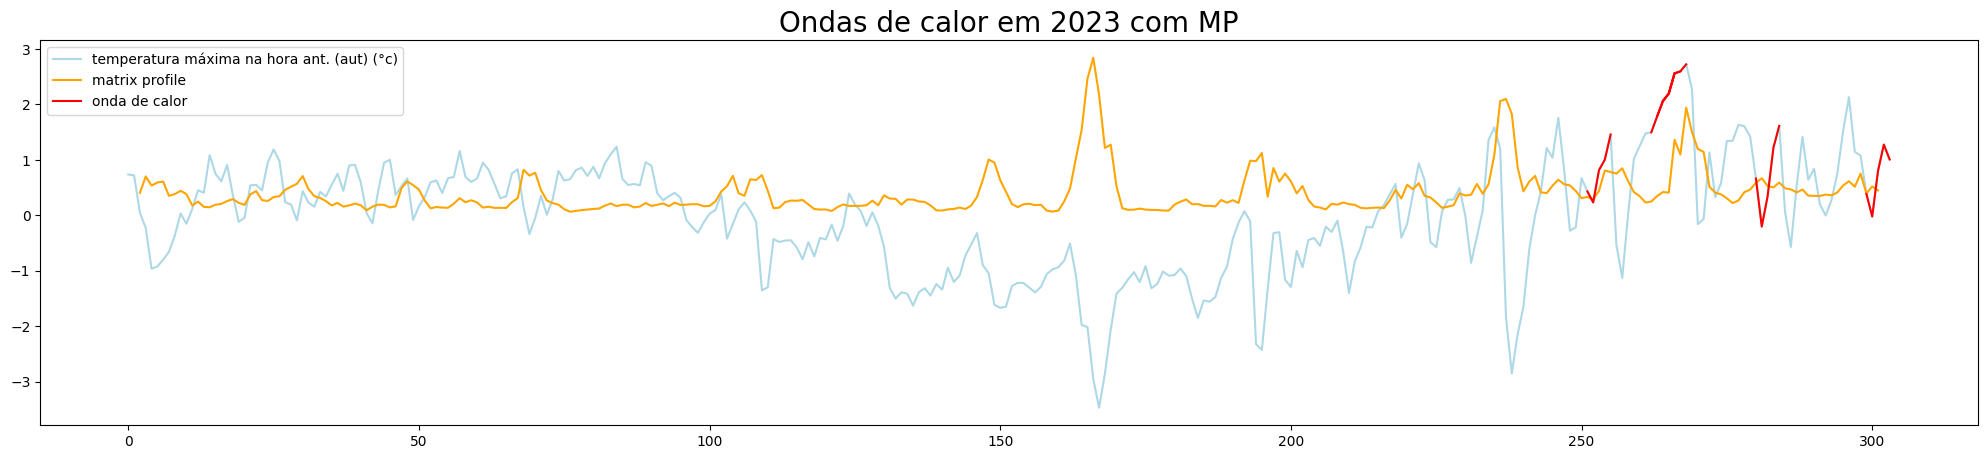

array([251, 262, 263, 264, 280, 299])

In [ ]:
year = 2023
window_length = 5
threshold = 0
title = f"Heat Waves in {year} sem MP"

matrix, finalMP, _ = get_matrix_profile(df_average, year, window_length, df_average.columns[1:-1])
plot_mp_with_anomalies(df_average, 'temperatura máxima na hora ant. (aut) (°c)', finalMP, window_length, threshold, title=title)

year = 2023
window_length = 5
threshold = 4
title = f"Ondas de calor em {year} com MP"

matrix, finalMP, _ = get_matrix_profile(df_average, year, window_length, df_average.columns[1:-1])
plot_mp_with_anomalies(df_average, 'temperatura máxima na hora ant. (aut) (°c)', finalMP, window_length, threshold, title=title)

Como podemos ver, ao deixarmos de utilizar o MP para selecionar anomalias, muitas outras subsequências são classificados como ondas de calor (e definitivamente não representam ondas de calor). Dessa forma, testamos alguns valores para **thereshold** no método:

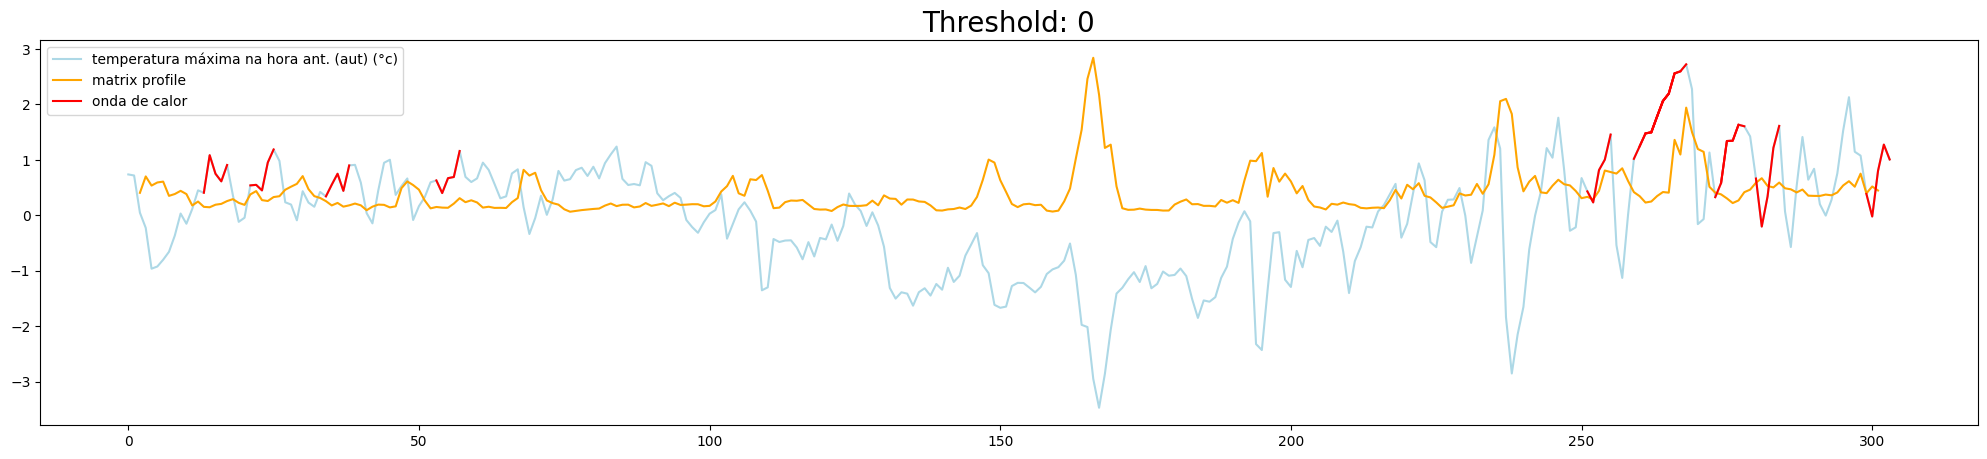

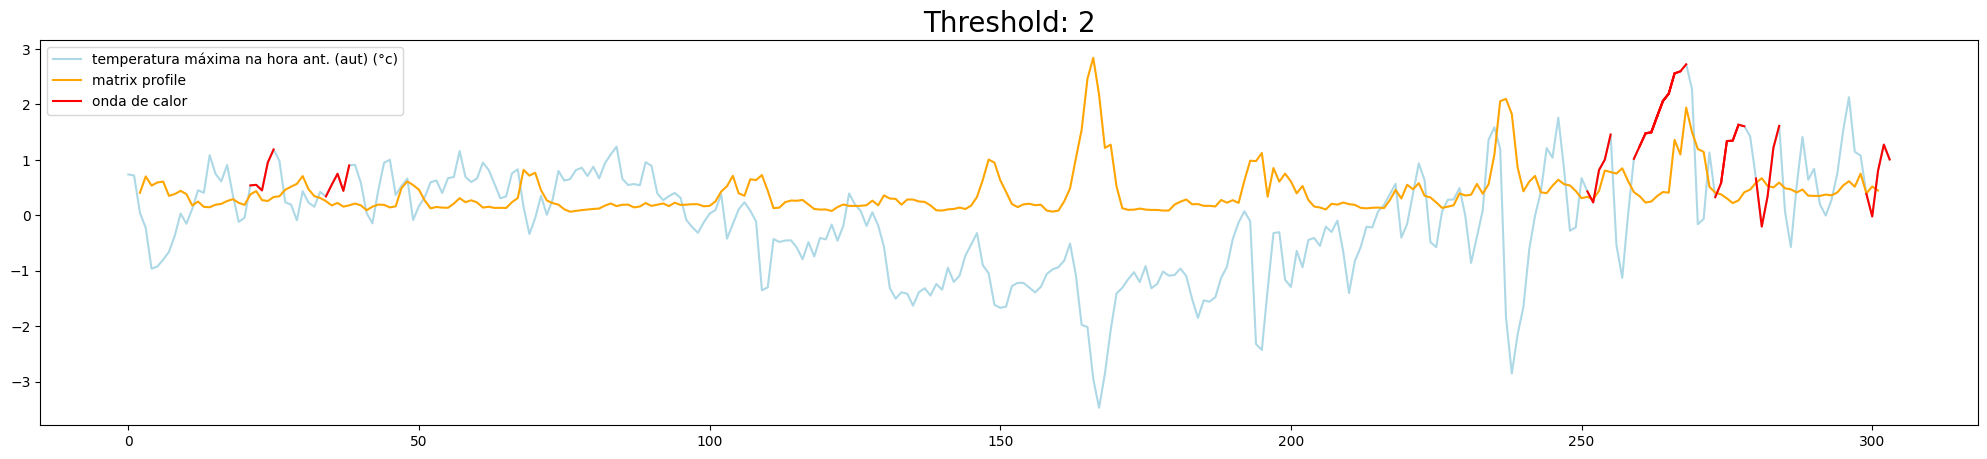

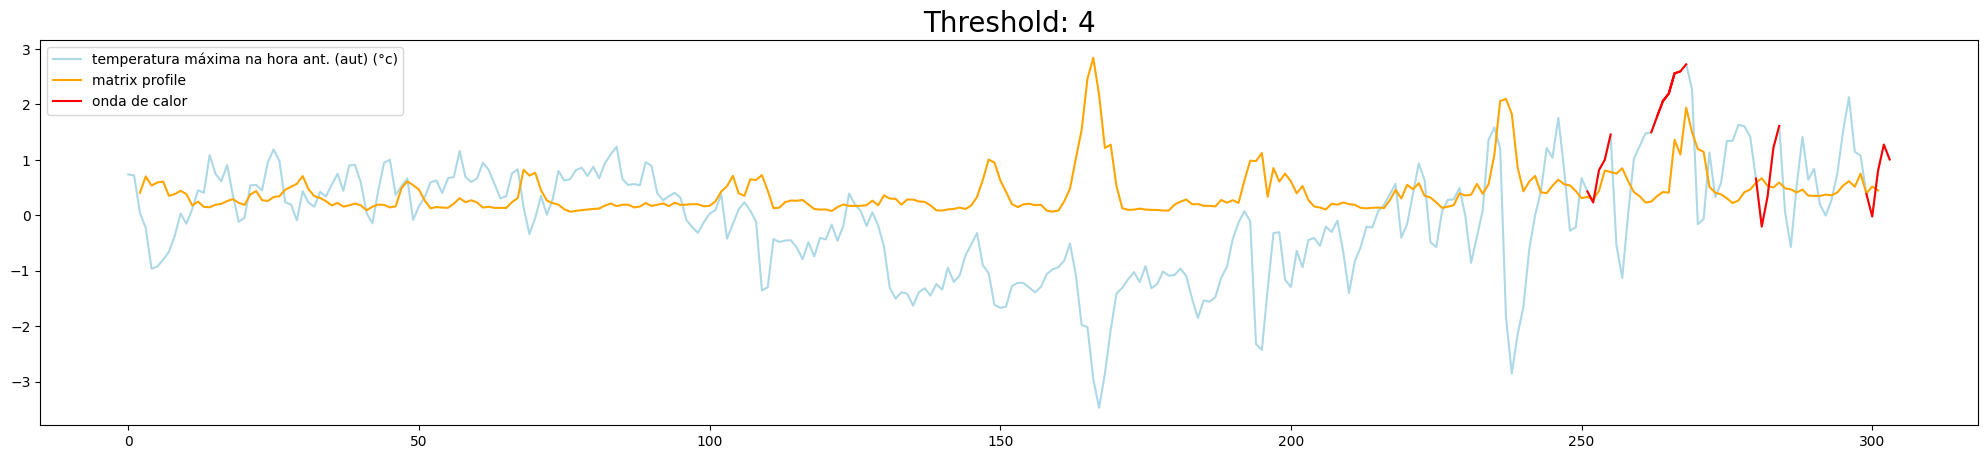

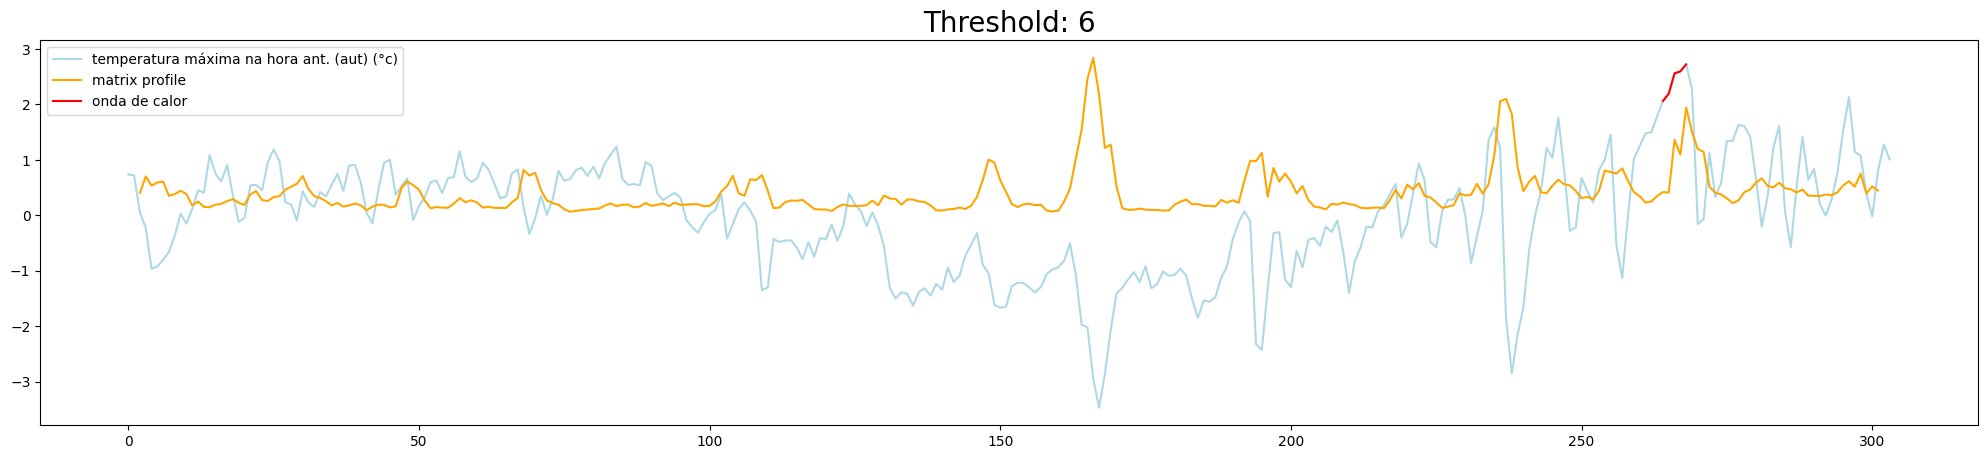

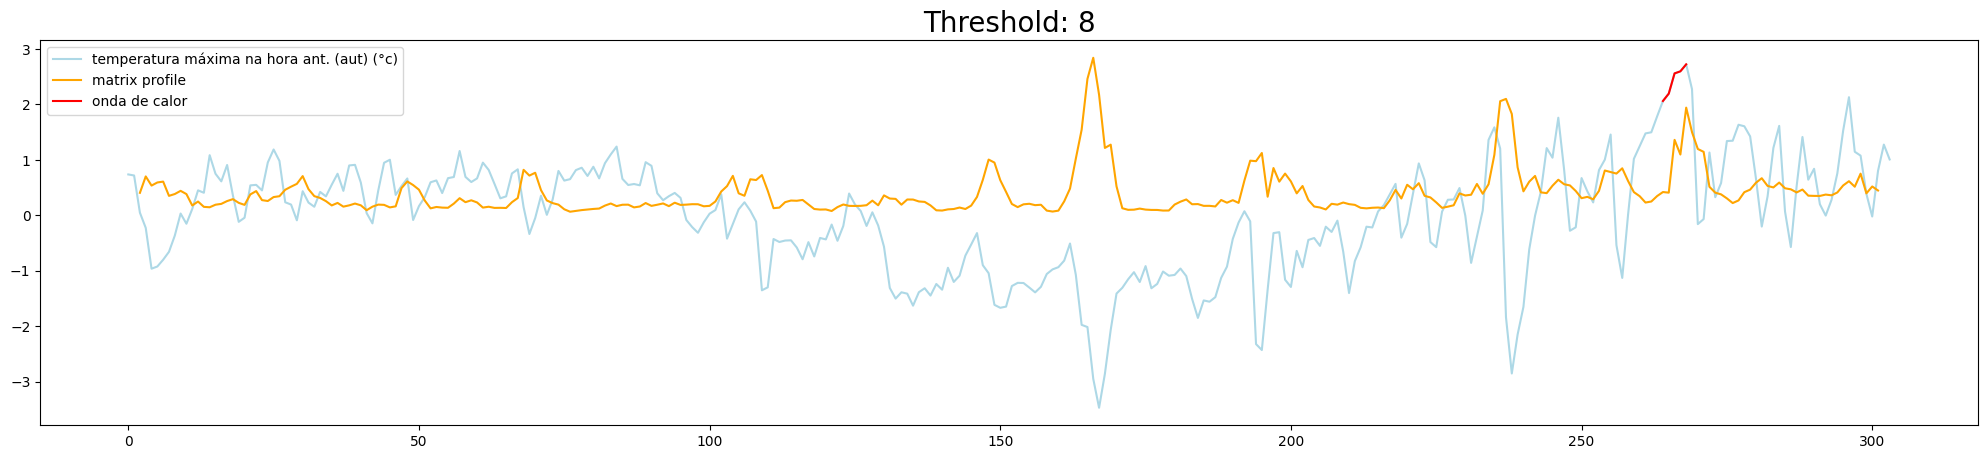

In [ ]:
for threshold in [0, 2, 4, 6, 8]:
    year = 2023
    window_length = 5

    matrix, finalMP, _ = get_matrix_profile(df_average, year, window_length, df_average.columns[1:-1])
    plot_mp_with_anomalies(df_average, 'temperatura máxima na hora ant. (aut) (°c)', finalMP, window_length, threshold, title=f"Threshold: {threshold}")

Por fim, apenas para visualização, plotamos um exemplo do Matrix Profile completo de um dos exemplos.

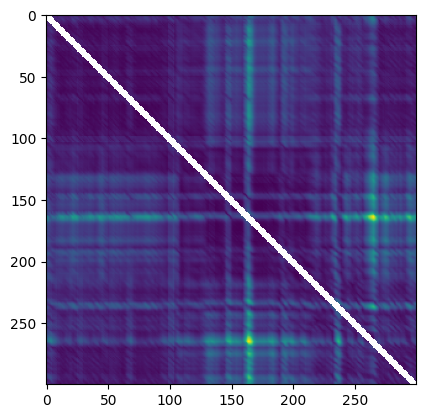

In [ ]:
year = 2023
window_length = 5
threshold = 0.5

matrix, finalMP, x = get_matrix_profile(df_average, year, window_length, df_average.columns[1:-1])
plt.imshow(matrix)

## Detecção de ondas de calor a partir de um treshold da derivada

Outra abordagem promissora encontrada pelo grupo para detecção de ondas de calor nos conjuntos de dados é utilizando derivadas apenas da série de temperaturas do ano. Utilizamos também de um **threshold** dos valores de derivação da série, buscando evidenciar as variações bruscas de temperatura.

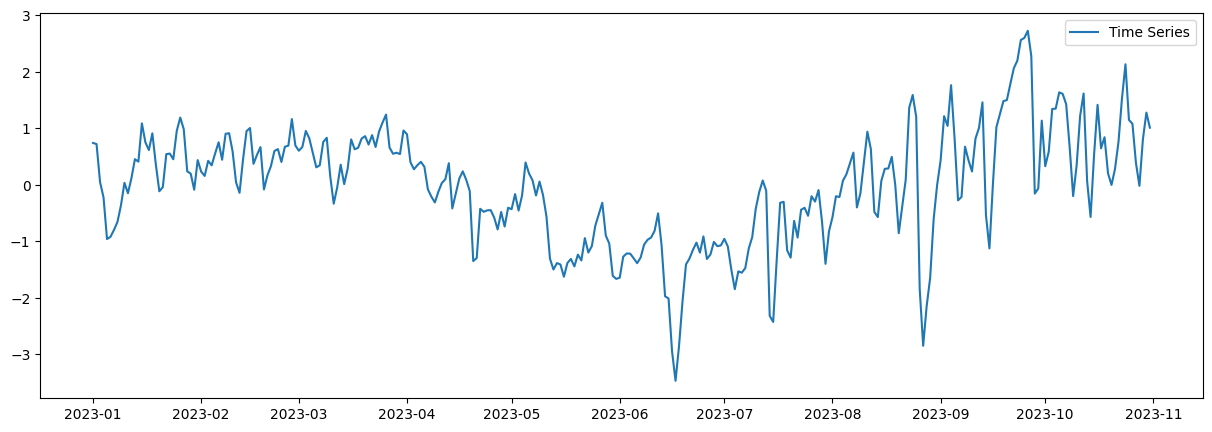

In [ ]:
year = 2023
plt.figure(figsize=(15, 5))
plt.plot(df_average.loc[df_average.data.dt.year == year].data, df_average[df_average.data.dt.year == year]['temperatura máxima na hora ant. (aut) (°c)'].values, label='Time Series')
plt.legend()
plt.show()

In [ ]:
# função que aplica derivada de ordem n na série
def diff_time_series(time_series, degree):
    time_series_diff = time_series.diff()
    for i in range(2, degree):
        time_series_diff = time_series_diff.diff()
    return time_series_diff

In [ ]:
# calcula a derivada da série
time_series = df_average[df_average.data.dt.year == year]['temperatura máxima na hora ant. (aut) (°c)']
time_series_diff = diff_time_series(time_series, 4)

# combina a série comum com a sua derivada calculada
data = pd.concat([time_series.shift(1), time_series_diff], axis=1).dropna()
data.columns = ['y_t', 'first_derivative']

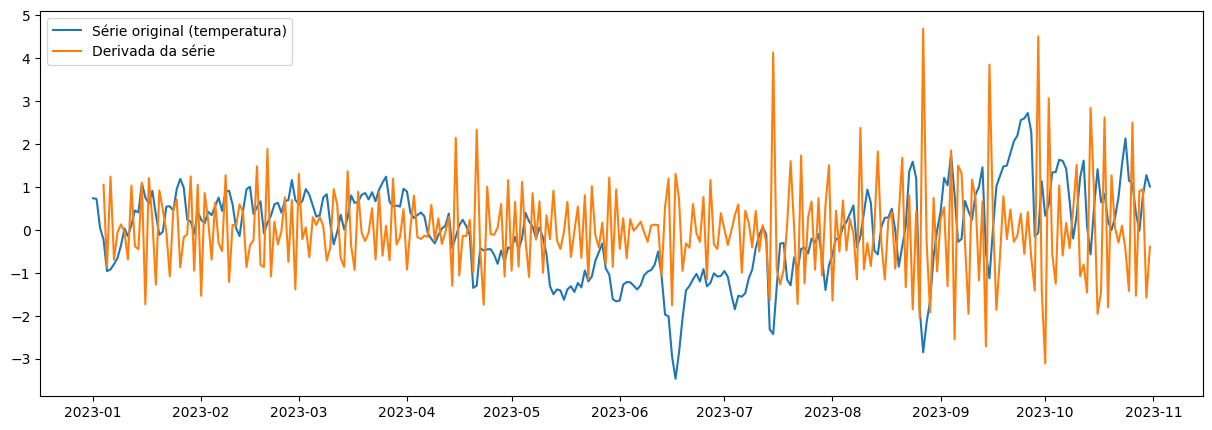

In [ ]:
year = 2023
plt.figure(figsize=(15, 5))
plt.plot(df_average.loc[df_average.data.dt.year == year].data, time_series, label='Série original (temperatura)')
plt.plot(df_average.loc[df_average.data.dt.year == year].data, time_series_diff, label='Derivada da série')
plt.legend()
plt.show()

Analisando os gráficos plotados, pode-se perceber facilmente pontos em que a derivada possui altos valores. Portanto definiremos um valor mínimo **thereshold** para selecionar os pontos com as maiores derivadas.

In [ ]:
threshold = 2.5
count = time_series[time_series_diff > threshold].count()
time_series[time_series_diff > threshold].head(count)

5674   -2.426241
5717   -2.848635
5736   -1.126146
5750   -0.066047
5753    0.584000
5765   -0.569354
5769    0.840454
5777    1.077707
Name: temperatura máxima na hora ant. (aut) (°c), dtype: float64

In [ ]:
possible_heat_waves = np.zeros(len(time_series_diff))

# pontos com altos valores positivos da derivada
for data, i in zip(time_series_diff[time_series_diff > threshold], time_series_diff[time_series_diff > threshold].index):
    possible_heat_waves[i % 5479] = data

# pontos com altos valores negativos da derivada
for data, i in zip(time_series_diff[time_series_diff < -threshold], time_series_diff[time_series_diff < -threshold].index):
    possible_heat_waves[i % 5479] = data

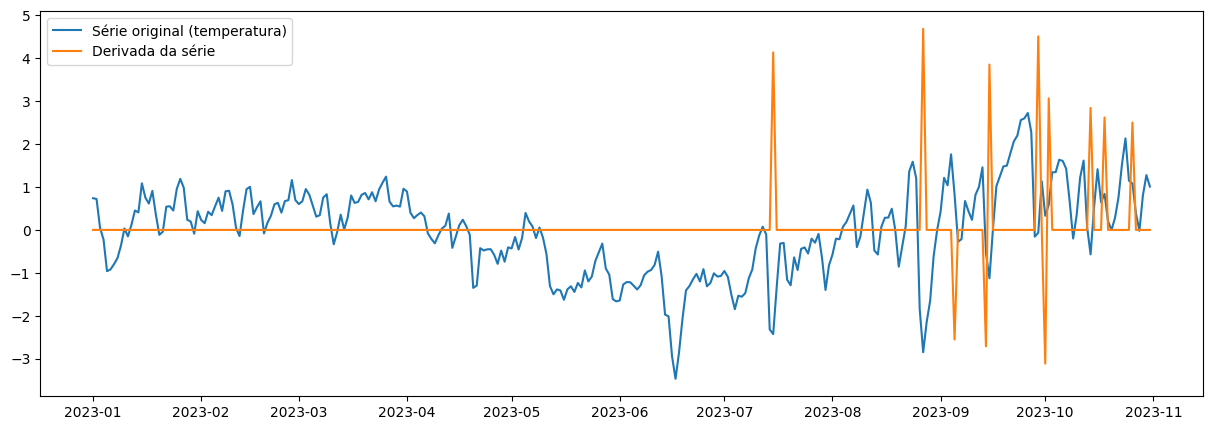

In [ ]:
year = 2023
plt.figure(figsize=(15, 5))
plt.plot(df_average.loc[df_average.data.dt.year == year].data, time_series, label='Série original (temperatura)')
plt.plot(df_average.loc[df_average.data.dt.year == year].data, possible_heat_waves, label='Derivada da série')
plt.legend()
plt.show()

Por fim, os pontos com altos valores absolutos da derivada selecionados apresentaram boas possibilidades de estarem presentes em ondas de calor, contudo este novo método apresentado não será aprofundado neste trabalho.